# Krig plot Avg

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
stations_info = pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\final_stations_koshi.csv")
stations_info

,station,Station Name,regions,lat,long,elevation
0,1316,Chatara,Tarai,26.820440,87.159170,105.0
1,1201,Namche Bazar,High Mountain,27.816670,86.716670,3450.0
2,1401,Olangchuhg G,High Mountain,27.683330,87.783330,3119.0
3,1225,Syangboche,High Mountain,27.816670,86.716670,3700.0
4,1218,Tengboche,High Mountain,27.833330,86.766670,3857.0
5,1206,Okhaldhunga,Hill,27.308121,86.504225,1731.0
6,1405,Taplejung,Hill,27.358611,87.670000,1744.0
7,1103,Jiri,Hill,27.630447,86.232114,1877.0
8,1036,Panchkhal,Hill,27.645134,85.620881,857.0
9,1016,Sarmathang,Middle Mountain,27.944561,85.595136,2574.0


In [3]:
trend_data = pd.read_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\stations_avg_slr_slope_results_df.csv")
trend_data

,station,slope_Tmin,intercept_Tmin,equation_Tmin,slope_Tmax,intercept_Tmax,equation_Tmax,slope_Tavg,intercept_Tavg,equation_Tavg
0,1016,0.009972,-13.732627,Tmin: y = 0.01x + -13.73,-0.008388,33.526697,Tmax: y = -0.01x + 33.53,0.000792,9.897035,Tavg: y = 0.00x + 9.90
1,1024,-0.019344,50.818174,Tmin: y = -0.02x + 50.82,-0.033511,89.734838,Tmax: y = -0.03x + 89.73,-0.026427,70.276506,Tavg: y = -0.03x + 70.28
2,1036,-0.054187,123.318213,Tmin: y = -0.05x + 123.32,-0.000650,29.407707,Tmax: y = -0.00x + 29.41,-0.027418,76.362960,Tavg: y = -0.03x + 76.36
3,1103,-0.022183,52.924866,Tmin: y = -0.02x + 52.92,0.016332,-12.022043,Tmax: y = 0.02x + -12.02,-0.002925,20.451411,Tavg: y = -0.00x + 20.45
4,1123,-0.048508,115.446601,Tmin: y = -0.05x + 115.45,0.007232,16.169163,Tmax: y = 0.01x + 16.17,-0.020638,65.807882,Tavg: y = -0.02x + 65.81
5,1124,0.004513,2.347696,Tmin: y = 0.00x + 2.35,0.007776,6.876356,Tmax: y = 0.01x + 6.88,0.006145,4.612026,Tavg: y = 0.01x + 4.61
6,1201,-0.019074,38.284789,Tmin: y = -0.02x + 38.28,-0.004186,19.696422,Tmax: y = -0.00x + 19.70,-0.011630,28.990606,Tavg: y = -0.01x + 28.99
7,1206,0.009711,-6.809509,Tmin: y = 0.01x + -6.81,0.045547,-69.263562,Tmax: y = 0.05x + -69.26,0.027629,-38.036535,Tavg: y = 0.03x + -38.04
8,1212,-0.062815,145.239807,Tmin: y = -0.06x + 145.24,-0.029806,91.554668,Tmax: y = -0.03x + 91.55,-0.046310,118.397237,Tavg: y = -0.05x + 118.40
9,1218,-0.008829,15.027283,Tmin: y = -0.01x + 15.03,-0.012306,33.316932,Tmax: y = -0.01x + 33.32,-0.010567,24.172108,Tavg: y = -0.01x + 24.17


In [4]:
# Merging the two DataFrames on the 'station' column
combined_data = pd.merge(stations_info, trend_data[['station', 'slope_Tmin', 'slope_Tmax', 'slope_Tavg']], on='station', how='inner')

# Display the combined DataFrame
print(combined_data.head())

   station  Station Name        regions       lat      long  elevation  \
0     1316       Chatara          Tarai  26.82044  87.15917      105.0   
1     1201  Namche Bazar  High Mountain  27.81667  86.71667     3450.0   
2     1401  Olangchuhg G  High Mountain  27.68333  87.78333     3119.0   
3     1225    Syangboche  High Mountain  27.81667  86.71667     3700.0   
4     1218     Tengboche  High Mountain  27.83333  86.76667     3857.0   

   slope_Tmin  slope_Tmax  slope_Tavg  
0   -0.014557   -0.004113   -0.009335  
1   -0.019074   -0.004186   -0.011630  
2   -0.005037    0.021022    0.007992  
3   -0.014340    0.009747   -0.002297  
4   -0.008829   -0.012306   -0.010567  


In [5]:
# Step 1: Read the shapefile
shapefile_path = r'G:\fresh_start\paper\code_paper\arcgis\koshibasin\physiographic_koshi\koshi_5_physiographic.shp'
boundary_gdf  = gpd.read_file(shapefile_path)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17132\129265337.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one


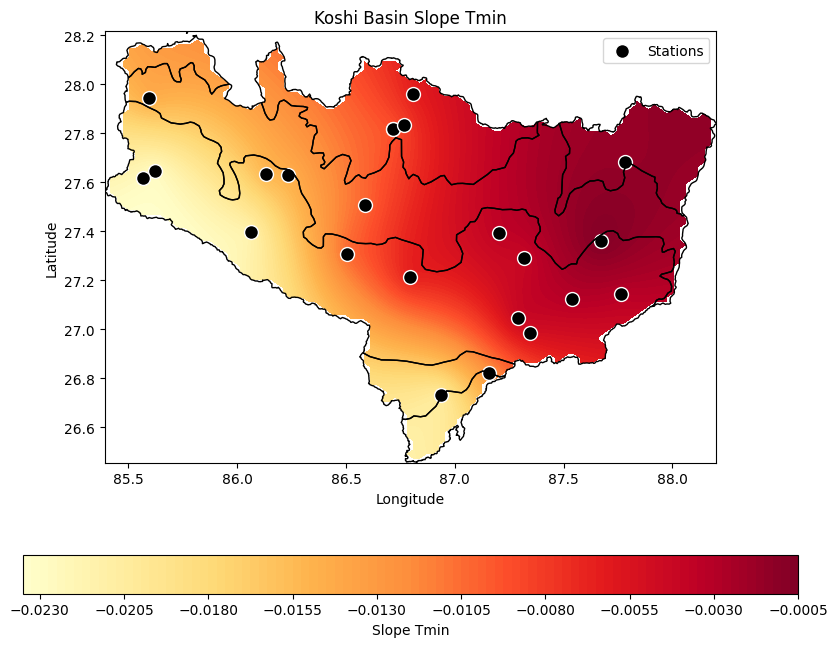

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17132\129265337.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one


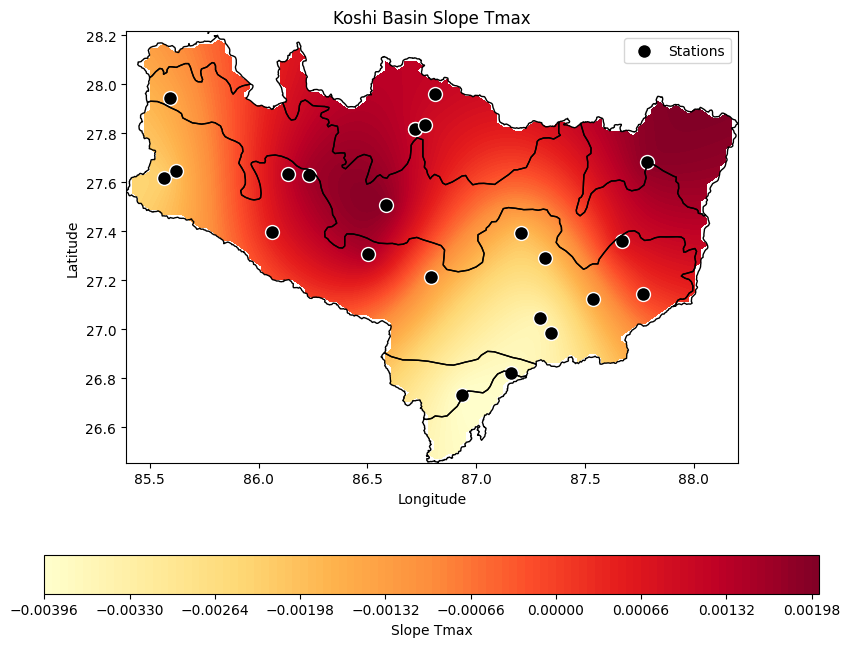

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17132\129265337.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one


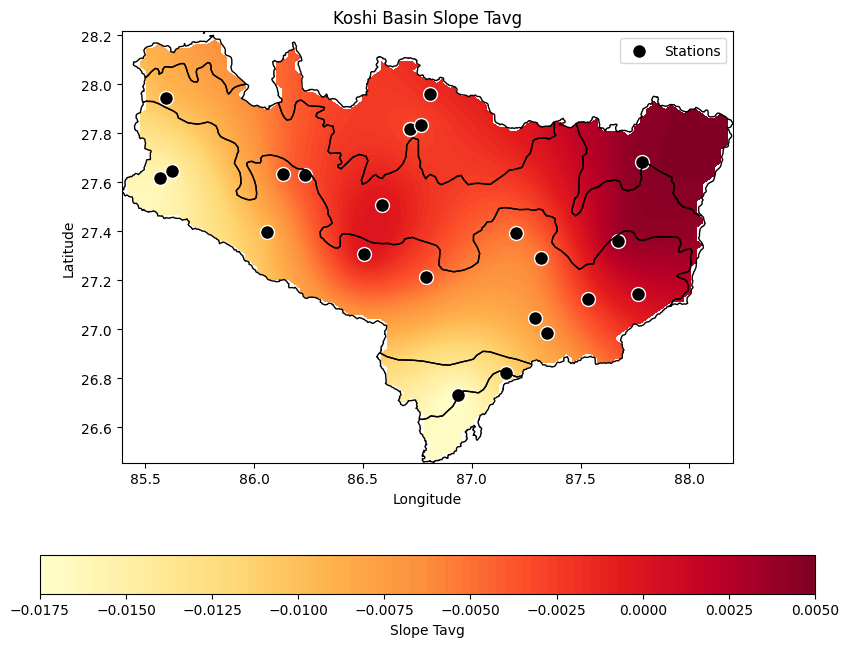

In [6]:
slope_columns = ['slope_Tmin', 'slope_Tmax', 'slope_Tavg']
titles = ['Koshi Basin Slope Tmin', 'Koshi Basin Slope Tmax', 'Koshi Basin Slope Tavg']
colorbar_labels = ['Slope Tmin', 'Slope Tmax', 'Slope Tavg']

# Loop through the slope columns and create a plot for each
for i, col in enumerate(slope_columns):
    # Extract data for interpolation
    values = combined_data[col].values
    coords = np.array(list(zip(combined_data['long'], combined_data['lat'])))
    
    # Define grid based on boundary file
    minx, miny, maxx, maxy = boundary_gdf.total_bounds
    gridx = np.linspace(minx, maxx, 100)
    gridy = np.linspace(miny, maxy, 100)

    # Perform Ordinary Kriging
    OK = OrdinaryKriging(
        combined_data['long'], combined_data['lat'], values,
        variogram_model='linear', verbose=False, enable_plotting=False
    )

    # Interpolate values over the grid
    z, ss = OK.execute('grid', gridx, gridy)

    # Create a meshgrid for plotting
    X, Y = np.meshgrid(gridx, gridy)

    # Mask values outside the boundary
    boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one
    mask = np.array([[boundary_polygon.contains(Point(x, y)) for x in gridx] for y in gridy])

    # Apply the mask to the interpolated values (keep only inside the boundary)
    z_masked = np.ma.masked_where(~mask, z)

    # Plot the masked interpolation inside the boundary
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, z_masked, cmap='YlOrRd', levels=100)  # Use grayscale colormap
    boundary_gdf.boundary.plot(ax=plt.gca(), color='black', linewidth=1)

    # Add station points with white borders
    plt.scatter(combined_data['long'], combined_data['lat'], facecolors='black', edgecolors='white', marker='o', s=100, label='Stations')

    # Add labels and title
    plt.title(titles[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Horizontal colorbar
    cbar = plt.colorbar(contour, orientation='horizontal')
    cbar.set_label(colorbar_labels[i])

    # Show legend
    plt.legend()
    plt.savefig(f"G:/fresh_start/paper/code_paper/plots/krig/avg_krig_{titles[i]}.png", dpi=300, bbox_inches='tight')


    # Display the plot
    plt.show()

# Krig plot Extreme

In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

In [8]:
stations_info = pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\final_stations_koshi.csv")
stations_info

,station,Station Name,regions,lat,long,elevation
0,1316,Chatara,Tarai,26.820440,87.159170,105.0
1,1201,Namche Bazar,High Mountain,27.816670,86.716670,3450.0
2,1401,Olangchuhg G,High Mountain,27.683330,87.783330,3119.0
3,1225,Syangboche,High Mountain,27.816670,86.716670,3700.0
4,1218,Tengboche,High Mountain,27.833330,86.766670,3857.0
5,1206,Okhaldhunga,Hill,27.308121,86.504225,1731.0
6,1405,Taplejung,Hill,27.358611,87.670000,1744.0
7,1103,Jiri,Hill,27.630447,86.232114,1877.0
8,1036,Panchkhal,Hill,27.645134,85.620881,857.0
9,1016,Sarmathang,Middle Mountain,27.944561,85.595136,2574.0


In [9]:
trend_data = pd.read_csv(r"G:\fresh_start\paper\code_paper\results\slr_n_mk_test\stations_slr_extreme_slope_results_df.csv")
trend_data

,station,slope_TNn,intercept_TNn,equation_TNn,slope_TXx,intercept_TXx,equation_TXx
0,1016,-0.034809,65.043405,TNn: y = -0.03x + 65.04,0.003474,16.188136,TXx: y = 0.00x + 16.19
1,1024,-0.067303,135.660035,TNn: y = -0.07x + 135.66,0.021890,-12.970658,TXx: y = 0.02x + -12.97
2,1036,-0.140907,283.730567,TNn: y = -0.14x + 283.73,-0.004160,42.420504,TXx: y = -0.00x + 42.42
3,1103,-0.046837,88.853862,TNn: y = -0.05x + 88.85,0.017417,-7.240972,TXx: y = 0.02x + -7.24
4,1123,-0.112001,231.378400,TNn: y = -0.11x + 231.38,0.048461,-59.294614,TXx: y = 0.05x + -59.29
5,1124,-0.028720,58.401855,TNn: y = -0.03x + 58.40,0.028860,-28.745545,TXx: y = 0.03x + -28.75
6,1201,0.007576,-25.577434,TNn: y = 0.01x + -25.58,-0.034327,86.241371,TXx: y = -0.03x + 86.24
7,1206,0.013577,-25.038075,TNn: y = 0.01x + -25.04,0.037323,-45.513829,TXx: y = 0.04x + -45.51
8,1212,-0.157114,320.891778,TNn: y = -0.16x + 320.89,-0.000486,40.248516,TXx: y = -0.00x + 40.25
9,1218,-0.007890,2.861256,TNn: y = -0.01x + 2.86,-0.043965,102.891121,TXx: y = -0.04x + 102.89


In [10]:
# Merging the two DataFrames on the 'station' column
combined_data = pd.merge(stations_info, trend_data[['station', 'slope_TNn', 'slope_TXx']], on='station', how='inner')

# Display the combined DataFrame
print(combined_data.head())

   station  Station Name        regions       lat      long  elevation  \
0     1316       Chatara          Tarai  26.82044  87.15917      105.0   
1     1201  Namche Bazar  High Mountain  27.81667  86.71667     3450.0   
2     1401  Olangchuhg G  High Mountain  27.68333  87.78333     3119.0   
3     1225    Syangboche  High Mountain  27.81667  86.71667     3700.0   
4     1218     Tengboche  High Mountain  27.83333  86.76667     3857.0   

   slope_TNn  slope_TXx  
0  -0.041680  -0.004438  
1   0.007576  -0.034327  
2   0.029578  -0.013583  
3  -0.012930  -0.002608  
4  -0.007890  -0.043965  


In [11]:
# Step 1: Read the shapefile
shapefile_path = r'G:\fresh_start\paper\code_paper\arcgis\koshibasin\physiographic_koshi\koshi_5_physiographic.shp'
boundary_gdf  = gpd.read_file(shapefile_path)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17132\105624059.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one


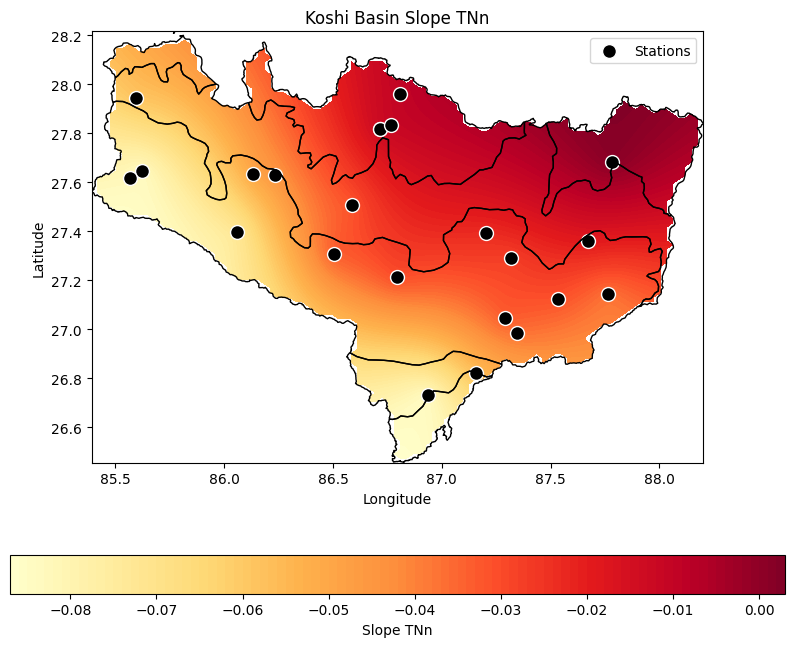

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17132\105624059.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one


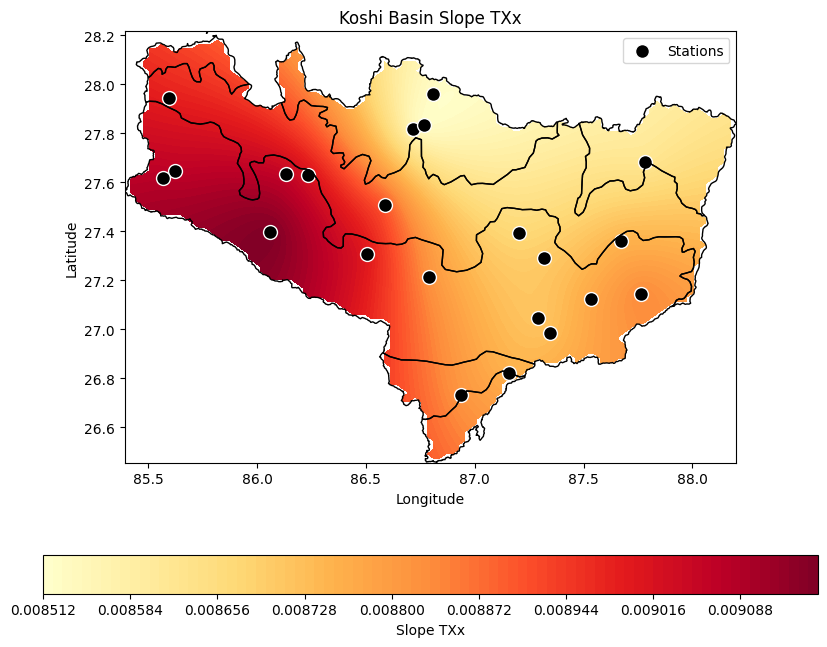

In [12]:
slope_columns = ['slope_TNn', 'slope_TXx']
titles = ['Koshi Basin Slope TNn', 'Koshi Basin Slope TXx']
colorbar_labels = ['Slope TNn', 'Slope TXx']

# Loop through the slope columns and create a plot for each
for i, col in enumerate(slope_columns):
    # Extract data for interpolation
    values = combined_data[col].values
    coords = np.array(list(zip(combined_data['long'], combined_data['lat'])))
    
    # Define grid based on boundary file
    minx, miny, maxx, maxy = boundary_gdf.total_bounds
    gridx = np.linspace(minx, maxx, 100)
    gridy = np.linspace(miny, maxy, 100)

    # Perform Ordinary Kriging
    OK = OrdinaryKriging(
        combined_data['long'], combined_data['lat'], values,
        variogram_model='linear', verbose=False, enable_plotting=False
    )

    # Interpolate values over the grid
    z, ss = OK.execute('grid', gridx, gridy)

    # Create a meshgrid for plotting
    X, Y = np.meshgrid(gridx, gridy)

    # Mask values outside the boundary
    boundary_polygon = boundary_gdf.unary_union  # Combine all boundary shapes into one
    mask = np.array([[boundary_polygon.contains(Point(x, y)) for x in gridx] for y in gridy])

    # Apply the mask to the interpolated values (keep only inside the boundary)
    z_masked = np.ma.masked_where(~mask, z)

    # Plot the masked interpolation inside the boundary
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, z_masked, cmap='YlOrRd', levels=100)  # Use grayscale colormap
    boundary_gdf.boundary.plot(ax=plt.gca(), color='black', linewidth=1)

    # Add station points with white borders
    plt.scatter(combined_data['long'], combined_data['lat'], facecolors='black', edgecolors='white', marker='o', s=100, label='Stations')

    # Add labels and title
    plt.title(titles[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Horizontal colorbar
    cbar = plt.colorbar(contour, orientation='horizontal')
    cbar.set_label(colorbar_labels[i])

    # Show legend
    plt.legend()
    plt.savefig(f"G:/fresh_start/paper/code_paper/plots/krig/extreme_krig_{titles[i]}.png", dpi=300, bbox_inches='tight')


    # Display the plot
    plt.show()